# Import Libraries

In [76]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the Dataset

In [77]:
df = pd.read_csv(r"E:\ML\Wholesale-customers-data.csv")

# Data Preprocessing

In [78]:
df.head(5)

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


In [79]:
df.isnull().sum()

Channel             0
Region              0
Fresh               0
Milk                0
Grocery             0
Frozen              0
Detergents_Paper    0
Delicassen          0
dtype: int64

In [80]:
df.drop(['Channel', 'Region'], axis=1, inplace=True)

In [81]:
df.duplicated().sum()

np.int64(0)

In [82]:
df.shape

(440, 6)

In [83]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 440 entries, 0 to 439
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Fresh             440 non-null    int64
 1   Milk              440 non-null    int64
 2   Grocery           440 non-null    int64
 3   Frozen            440 non-null    int64
 4   Detergents_Paper  440 non-null    int64
 5   Delicassen        440 non-null    int64
dtypes: int64(6)
memory usage: 20.8 KB


In [84]:
df.describe()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


In [85]:
from sklearn.preprocessing import StandardScaler

In [86]:
ss =StandardScaler()
data_scaled = ss.fit_transform(df)
df = pd.DataFrame(data_scaled, columns=df.columns) #  this is convert in dataframe

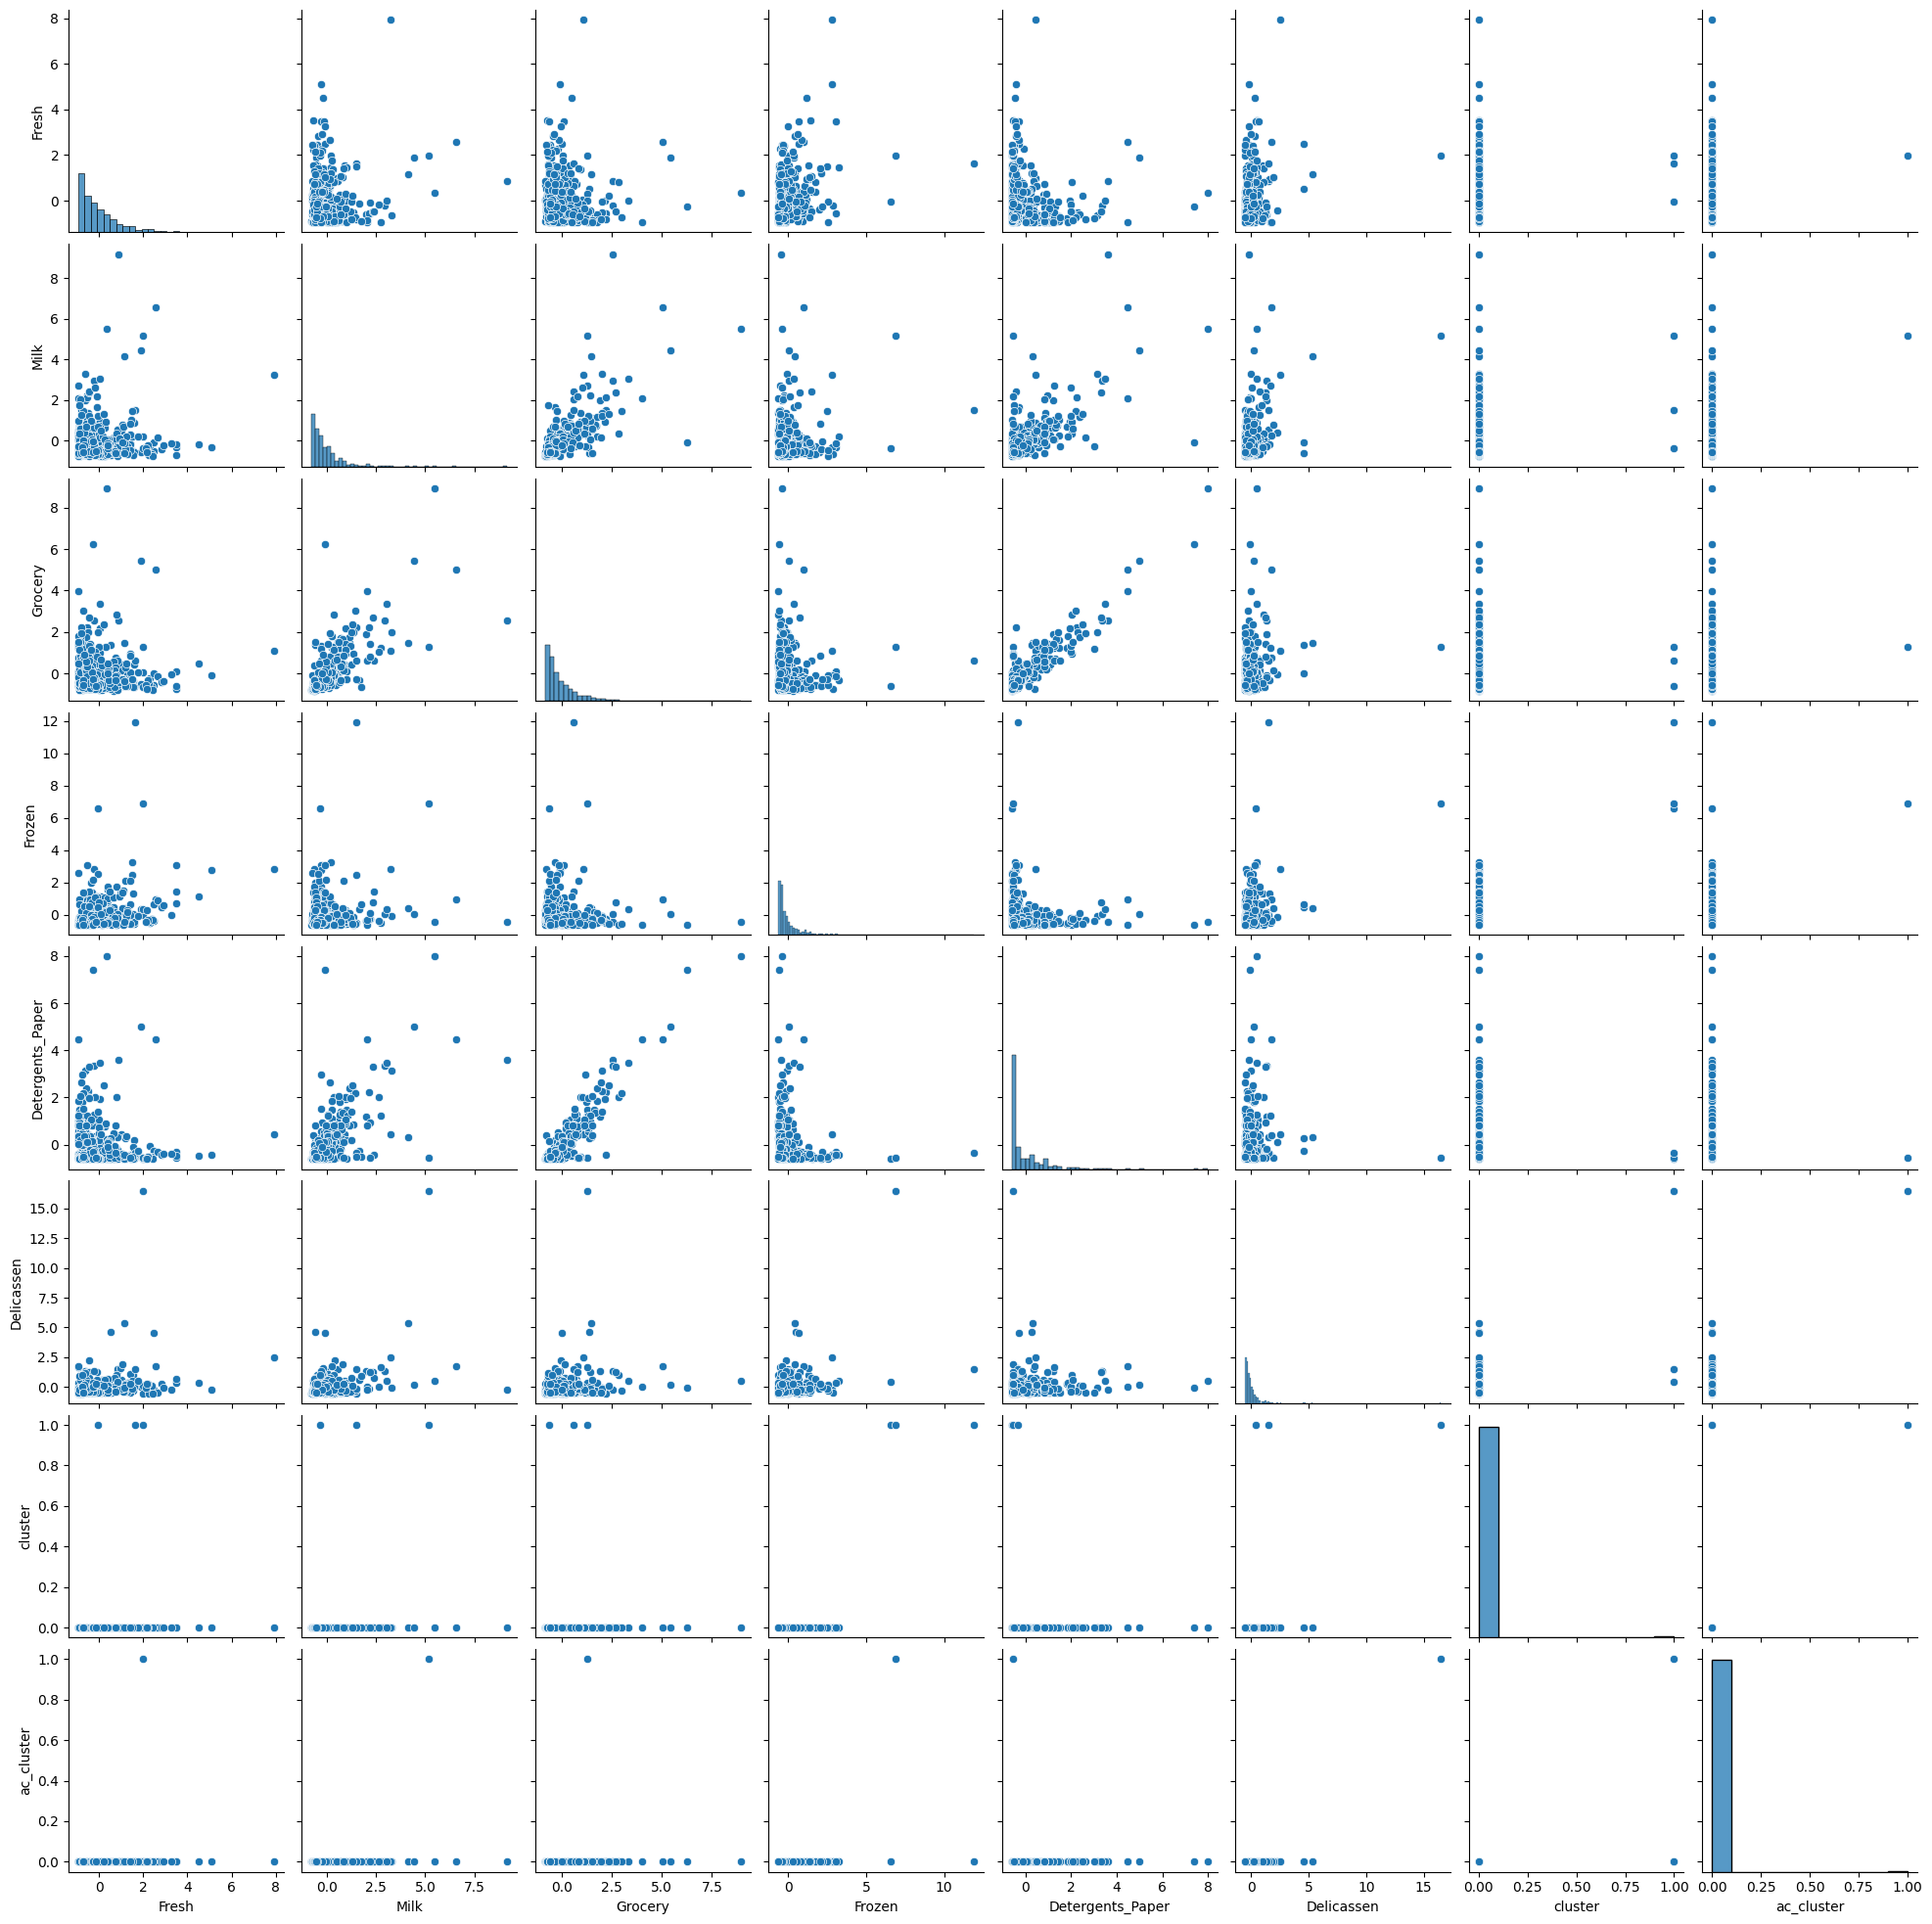

In [100]:
sns.pairplot(df)

From above graph we consider our dataset is non-Linear (Over Lapping)

# K-Means Clustering

In [88]:
from sklearn.cluster import KMeans

In [89]:
wcss=[]
for i in range(1,10):
    km = KMeans(n_clusters=i, init='k-means++', random_state=42)
    km.fit(df)
    wcss.append(km.inertia_)

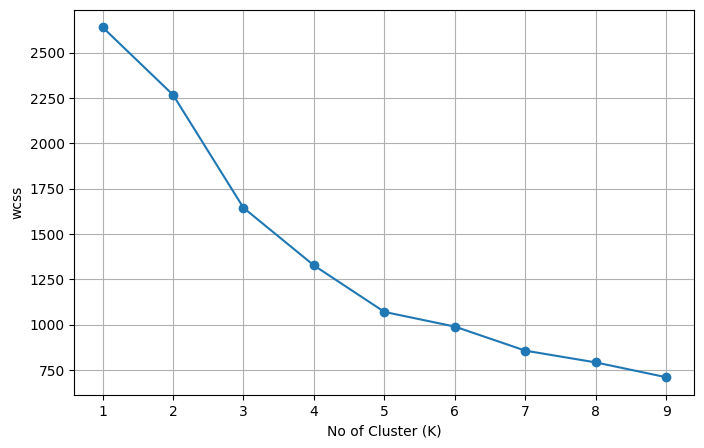

In [90]:
plt.figure(figsize=(8,5))
plt.plot(range(1,10), wcss, marker = 'o')
plt.xlabel('No of Cluster (K)')
plt.ylabel('wcss')
plt.grid()

# Choose the Number of Clusters (K)

In [91]:
k = 2
kmn = KMeans(n_clusters=k)
df["cluster"] = kmn.fit_predict(df)

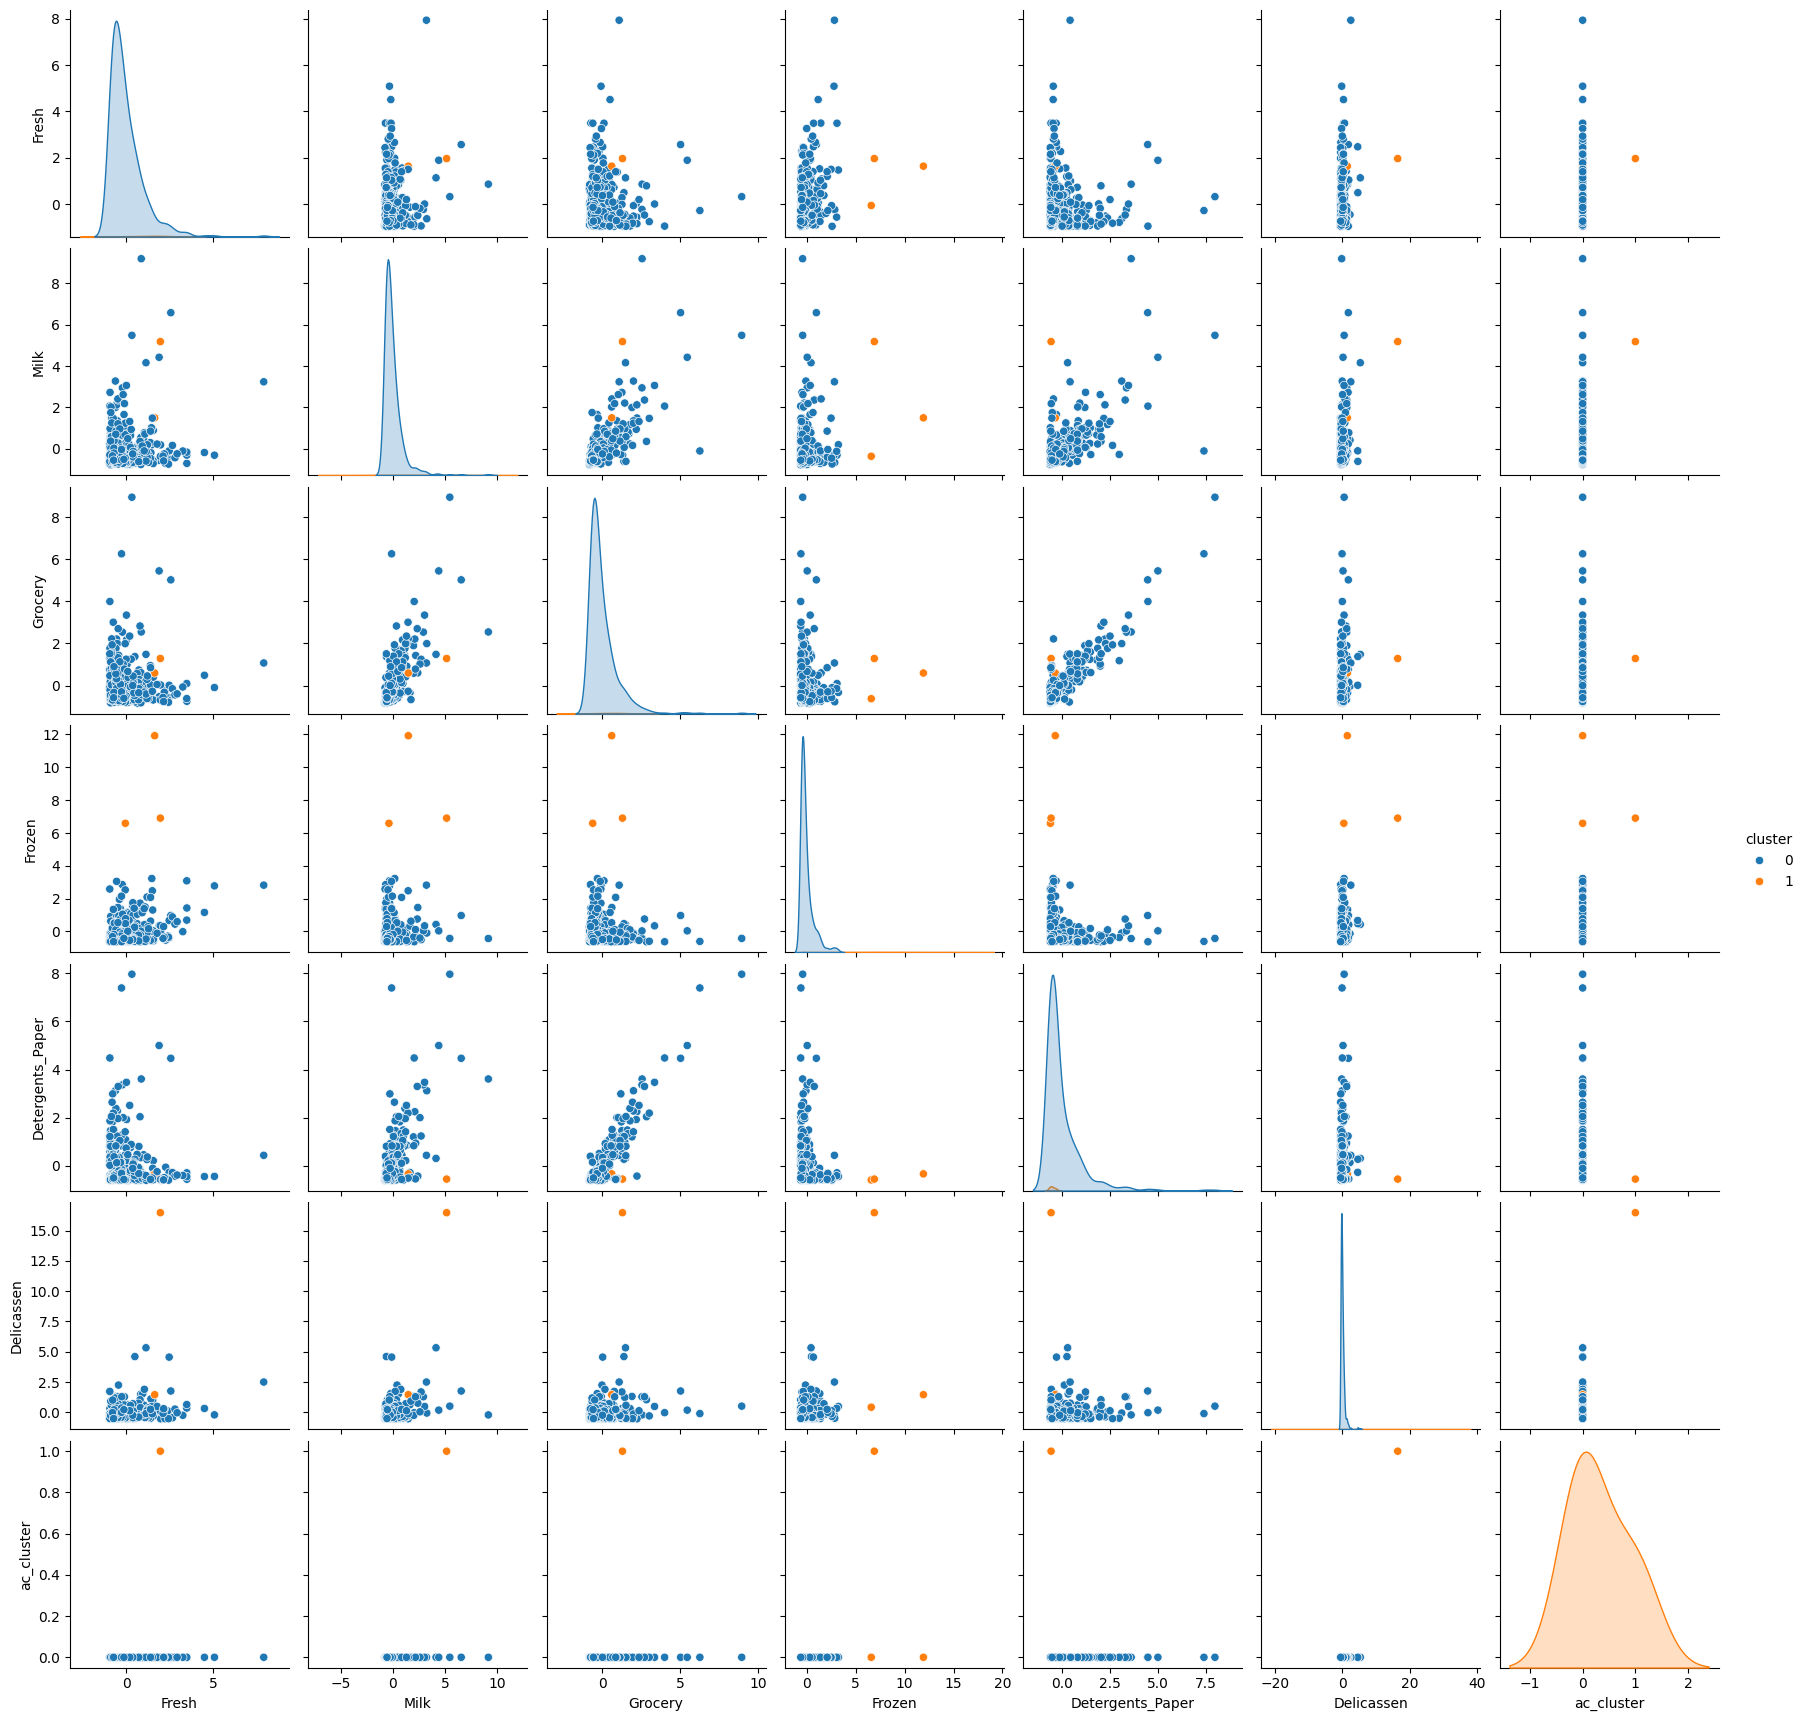

In [101]:
sns.pairplot(df, hue= 'cluster')

# Hierarchical cluster (Algomerative)

In [93]:
import scipy.cluster.hierarchy as sc

# Dendogram

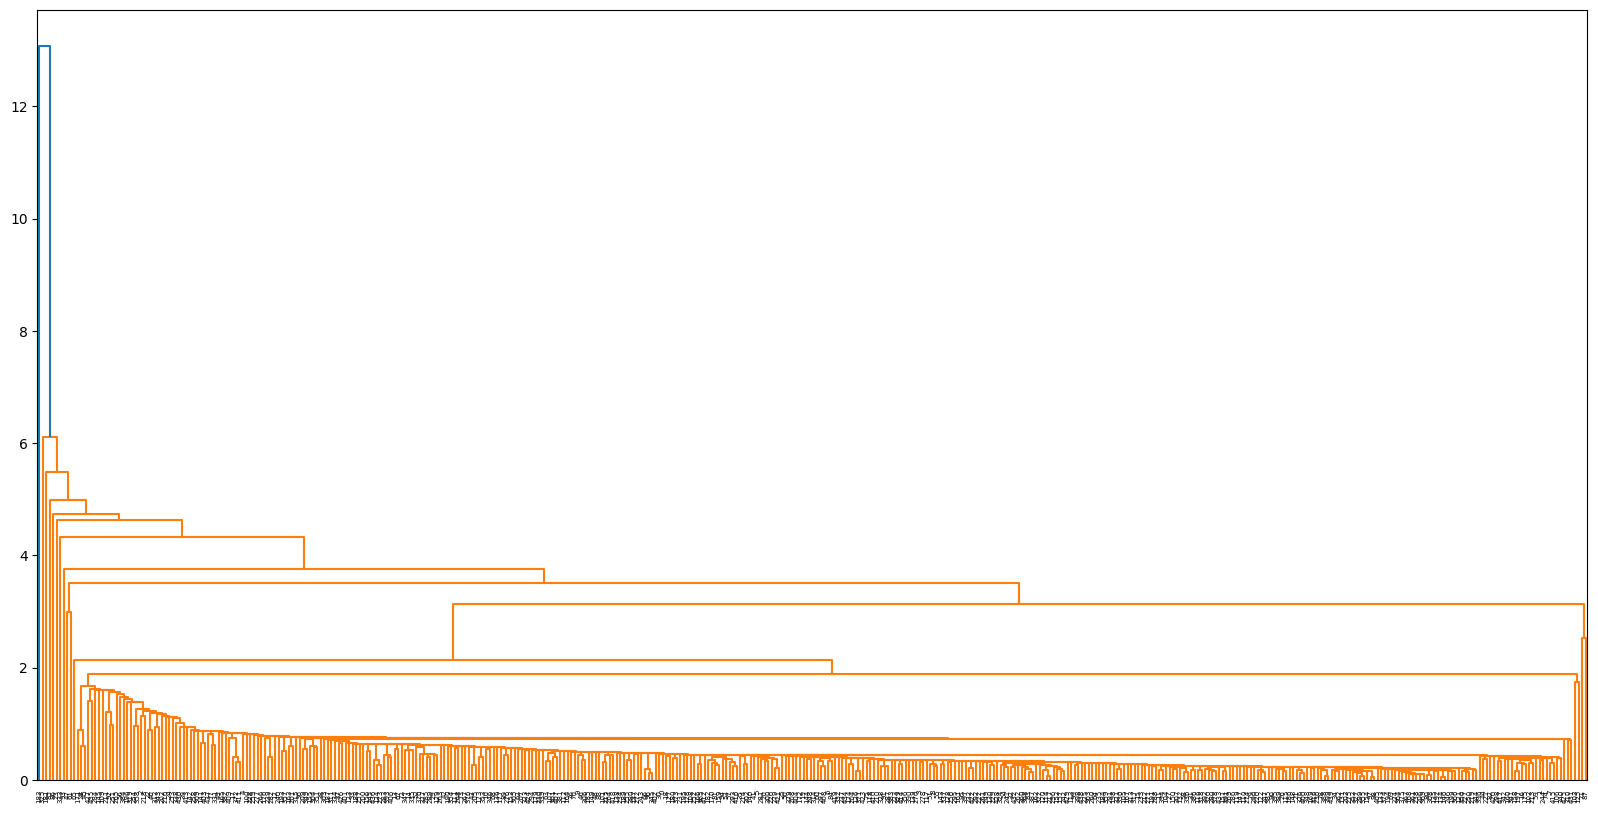

In [105]:
plt.figure(figsize=(20,10))
sc.dendrogram(sc.linkage(df, method='single', metric='euclidean'))
plt.savefig('demo.jpg')

In [95]:
from sklearn.cluster import AgglomerativeClustering

In [96]:
ac = AgglomerativeClustering(n_clusters=k , linkage='single')
df["ac_cluster"] = ac.fit_predict(df)

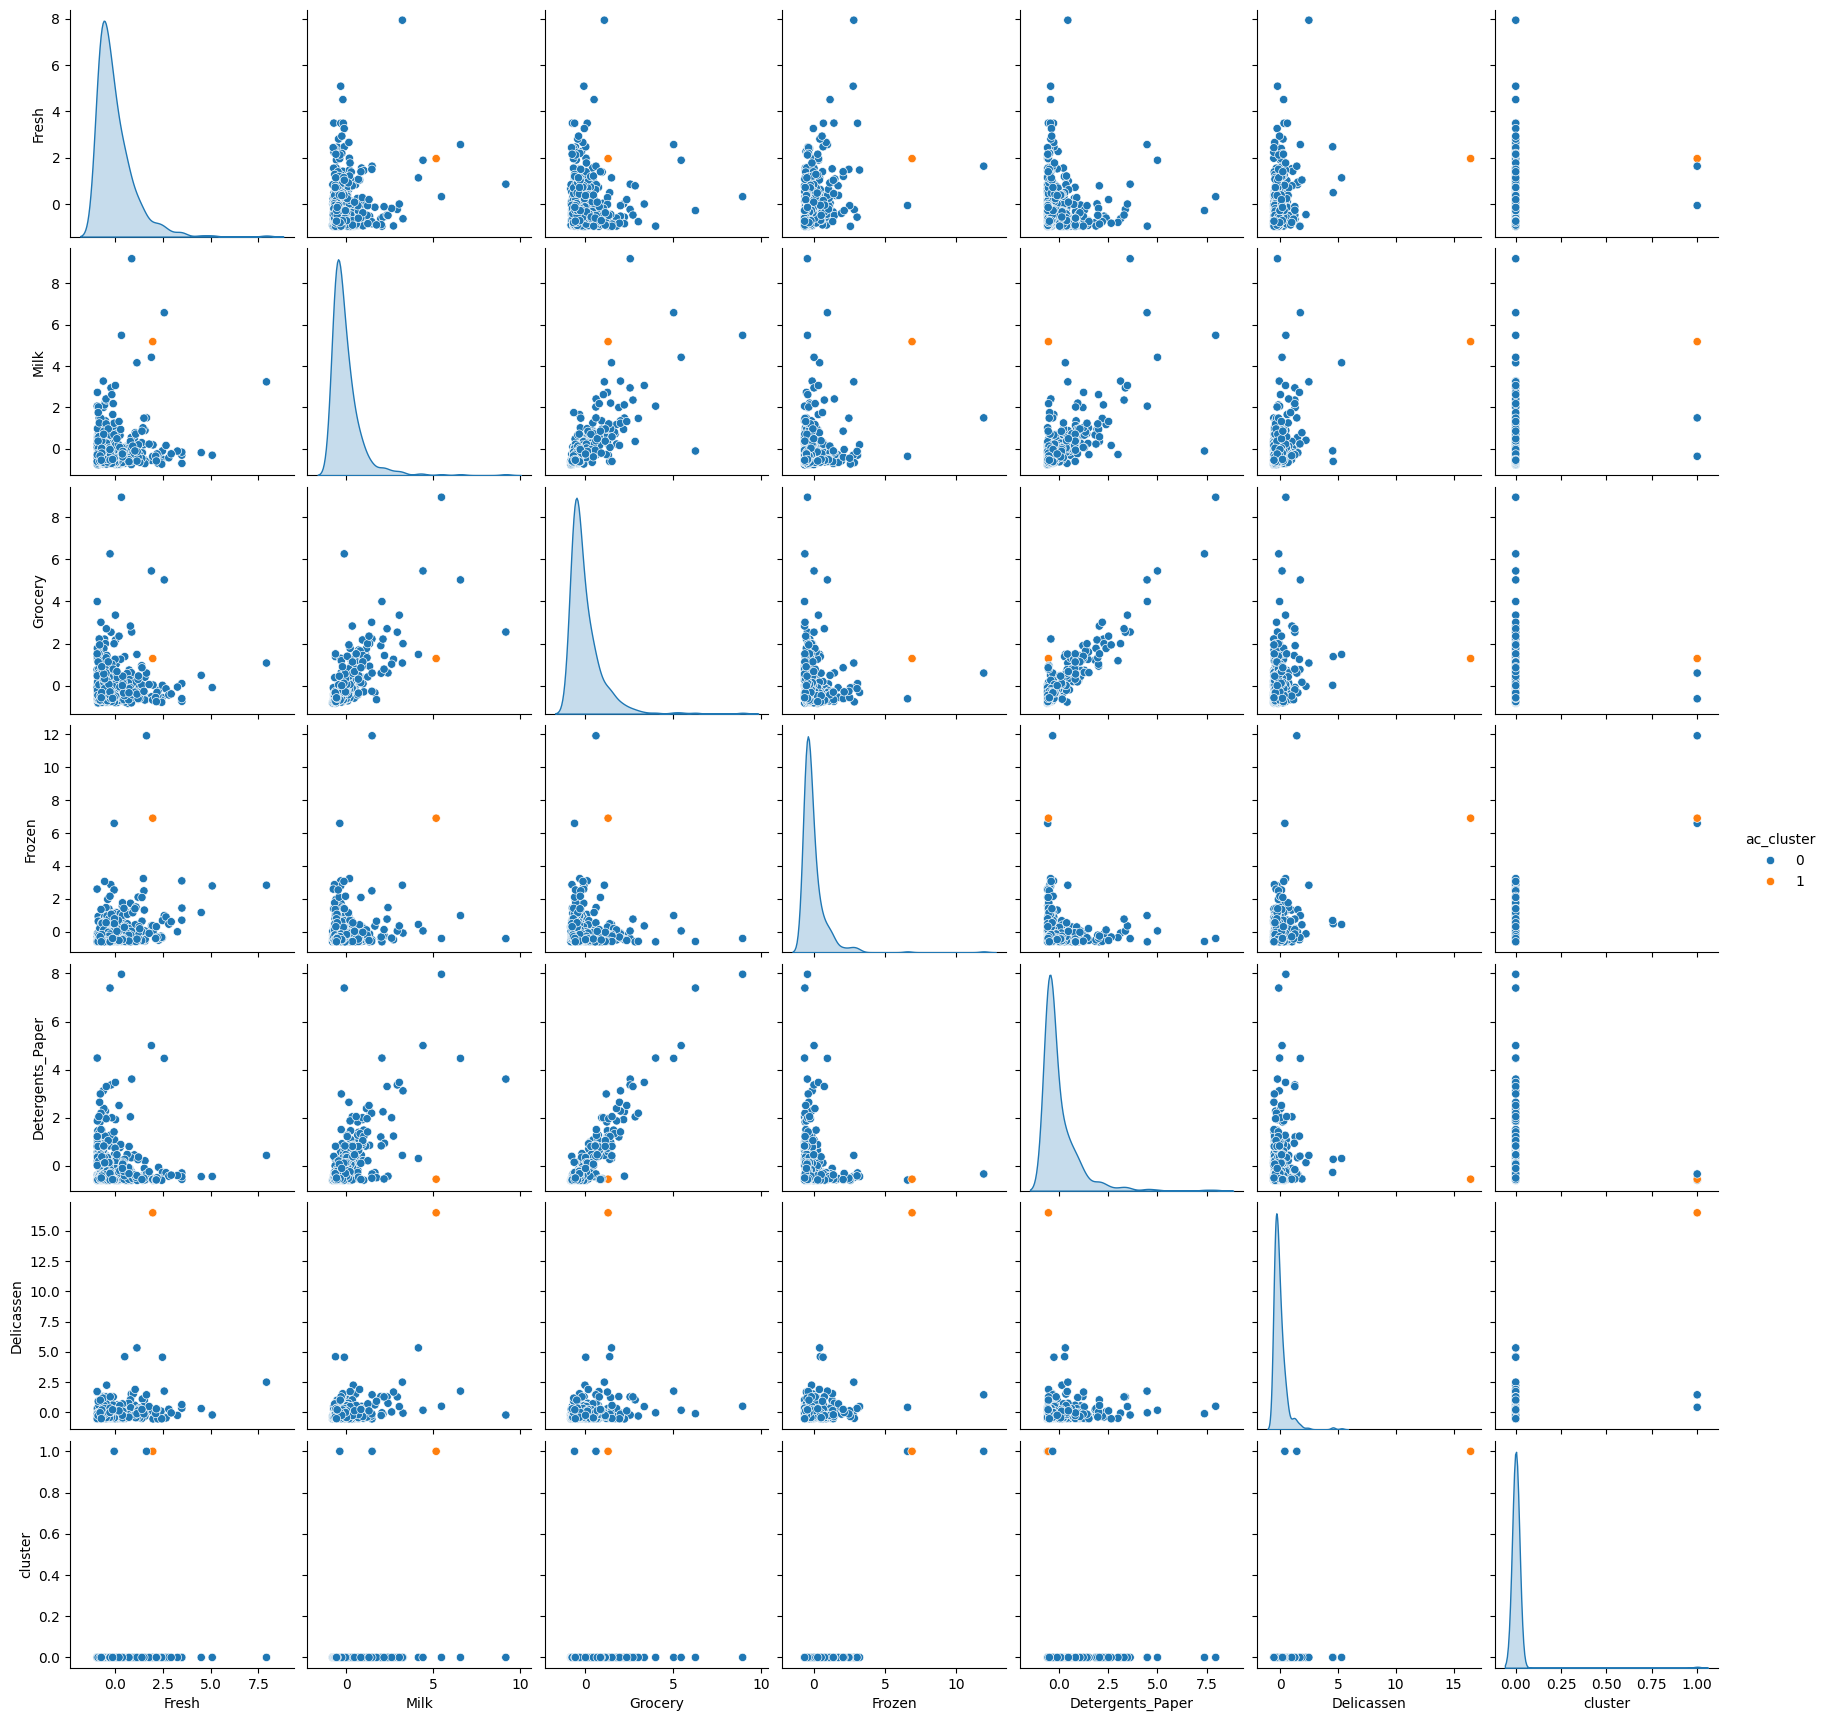

In [103]:
sns.pairplot(df, hue= 'ac_cluster')

# silhouette score

In [98]:
from sklearn.metrics import silhouette_score


In [99]:
# Evaluate cluster quality using silhouette score
silhouette_cluster = silhouette_score(df, df['cluster'])
print(f"Silhouette Score for 'Cluster': {silhouette_cluster}")

silhouette_agg_cluster = silhouette_score(df, df['ac_cluster'])
print(f"Silhouette Score for 'Ac_Cluster': {silhouette_agg_cluster}")


Silhouette Score for 'Cluster': 0.8039867416493246
Silhouette Score for 'Ac_Cluster': 0.8641536304027353
